In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot
%matplotlib inline
import seaborn as sns
data =pd.read_csv('aug_train_preprocessed.csv')
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,3,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,3,0,5,6,4,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,6,82,0
3,19067,14,52,3,1,2,0,1,20,8,5,6,51,1
4,358,50,45,1,0,3,2,5,21,4,1,3,7,0


In [2]:
data.shape

(19158, 14)

In [3]:
df=pd.DataFrame(data)
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,5018,5,85,1,0,3,0,5,21,8,6,0,35,1
1,16986,77,48,1,1,3,0,5,6,4,5,4,46,0
2,6499,64,14,3,1,0,0,5,15,8,6,6,82,0
3,19067,14,52,3,1,2,0,1,20,8,5,6,51,1
4,358,50,45,1,0,3,2,5,21,4,1,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,4117,55,71,1,1,3,0,2,5,8,6,0,41,1
19154,17981,5,85,1,0,3,0,5,5,8,6,3,51,1
19155,14021,5,85,1,0,3,0,5,21,4,5,3,43,0
19156,3185,94,56,1,0,3,1,6,20,5,5,1,95,0


In [4]:
x=data.drop(columns='target')
x

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5018,5,85,1,0,3,0,5,21,8,6,0,35
1,16986,77,48,1,1,3,0,5,6,4,5,4,46
2,6499,64,14,3,1,0,0,5,15,8,6,6,82
3,19067,14,52,3,1,2,0,1,20,8,5,6,51
4,358,50,45,1,0,3,2,5,21,4,1,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,4117,55,71,1,1,3,0,2,5,8,6,0,41
19154,17981,5,85,1,0,3,0,5,5,8,6,3,51
19155,14021,5,85,1,0,3,0,5,21,4,5,3,43
19156,3185,94,56,1,0,3,1,6,20,5,5,1,95


In [5]:
y=data['target']
y

0        1
1        0
2        0
3        1
4        0
        ..
19153    1
19154    1
19155    0
19156    0
19157    0
Name: target, Length: 19158, dtype: int64

In [6]:
# Normalization
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x

array([[-0.8246182 , -1.10520322,  0.75589002, ...,  0.79735656,
        -0.90426948, -0.51266315],
       [ 1.33940561,  0.9250771 , -0.5100811 , ...,  0.12727905,
         0.91825376, -0.30004804],
       [-0.55682748,  0.55849871, -1.67340591, ...,  0.79735656,
         1.82951538,  0.39578325],
       ...,
       [ 0.80328173, -1.10520322,  0.75589002, ...,  0.12727905,
         0.46262295, -0.35803398],
       [-1.15605667,  1.40444885, -0.23635762, ...,  0.12727905,
        -0.44863867,  0.64705566],
       [ 0.72119059,  1.43264719,  0.14001218, ...,  0.79735656,
        -0.90426948,  1.20758643]])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.80,random_state=0)

In [8]:
# SVM
# "linear", "poly", "rbf"
from sklearn import svm
clf_rbf = svm.SVC(kernel='rbf',gamma=0.1,C=1.0).fit(x_train,y_train)
clf_poly= svm.SVC(kernel='poly', degree=3, C=1.0).fit(x_train,y_train)
clf_lin= svm.SVC(kernel='linear', C=1.0).fit(x_train,y_train)
#clf.fit(x_train,y_train)

In [9]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score,recall_score

#y_pred = clf.predict(x_test)
y_pred_rbf= clf_rbf.predict(x_test)
y_pred_poly= clf_poly.predict(x_test)
y_pred_lin= clf_lin.predict(x_test)

In [16]:
pd.crosstab(y_test, y_pred_poly, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2581,304,2885
1,543,404,947
All,3124,708,3832


In [10]:
print("RBF ACC=", accuracy_score(y_test, y_pred_rbf))
print("LINEAR ACC=", accuracy_score(y_test, y_pred_lin))
print("POLY ACC=", accuracy_score(y_test, y_pred_poly))

RBF ACC= 0.7776617954070981
LINEAR ACC= 0.7528705636743215
POLY ACC= 0.7789665970772442


In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2885
           1       0.57      0.43      0.49       947

    accuracy                           0.78      3832
   macro avg       0.70      0.66      0.67      3832
weighted avg       0.76      0.78      0.77      3832



In [13]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, y_pred_poly))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, y_pred_poly))

Precision: 0.5706214689265536
Recall: 0.426610348468849


<AxesSubplot:>

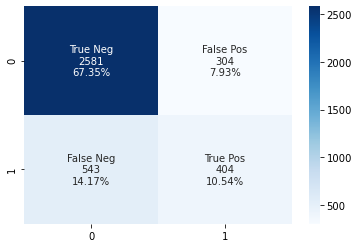

In [17]:
cf_matrix=confusion_matrix(y_test,y_pred_poly)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

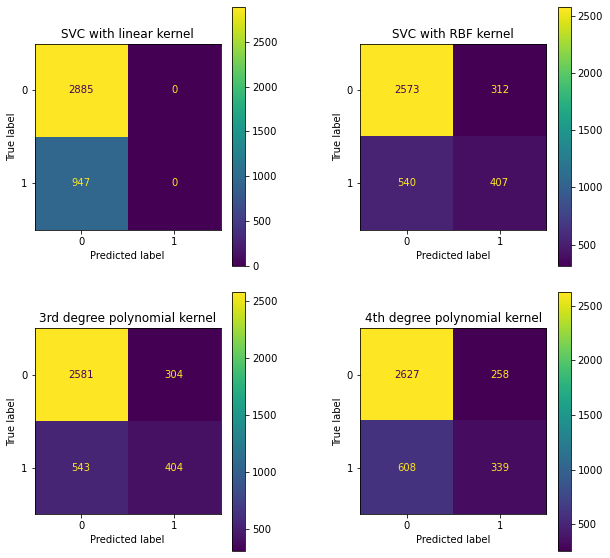

In [14]:
clf_poly4= svm.SVC(kernel='poly', degree=4, C=1.0).fit(x_train,y_train)
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          '3rd degree polynomial kernel',
          '4th degree polynomial kernel']


figure, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i, clf in enumerate((clf_lin, clf_rbf, clf_poly,clf_poly4)):
    plot_confusion_matrix(clf, x_test, y_test, ax = axes[i])
    axes[i].set_title(titles[i])
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()